# <font color=#0066ff> User Provisioning </font>


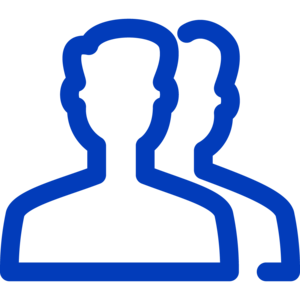

## <font color='yellow'>Code for token generation and API management</font>
      

In [ ]:
#@title Select **servicePack** the Sample should run
from subprocess import getstatusoutput
servicePack = "DEMO"

if servicePack == 'DEMO':
  branch = 'main'
else:
  branch = servicePack
print(branch)
rm = getstatusoutput("rm Colab_shared_code_for_API_usage -rf ") 
clone = getstatusoutput("git clone -l -s --branch " +  branch + " https://github.com/kyriba/Colab_shared_code_for_API_usage.git") 
import importlib
try:  
  importlib.reload(sample_requests)
except:
  print()
from Colab_shared_code_for_API_usage import sample_requests


In [ ]:
#@title Import custom modules
import time
from datetime import datetime,date
import json as js
import copy
import numpy as np



## <font color='yellow'>Connect and  retrieve token</font>

In [ ]:
#@title <font color='lime'>Connect</font>
print('token:')
token = sample_requests.login()

## <font color='yellow'>Create and get user details</font>

In [ ]:
#@title <font color='lime'> Create a user</font>
#@markdown Provide values for parameters below:
code = 'USRTEST2' #@param {type:"string"}
interfaceCode = 'USRTEST2' #@param {type: "string"}
firstName = 'John' #@param {allow-input: true} {type:"string"} 
lastName = 'Doe' #@param {allow-input: true} {type:"string"} 
accessProfileCode = 'AUTO' #@param {allow-input: true} {type:"string"} 
timeZone = 'CET' #@param {allow-input: true} {type:"string"} 
preferredContactChannel = 'EMAIL' #@param ["OFFICE_PHONE", "MOBILE_PHONE", "EMAIL"] {type:"string"} 
email = 'test@gmail.com' #@param {allow-input: true} {type:"string"} 
officePhone = 1234 #@param {allow-input: true} {type:"integer"} 
mobilePhone = 1234 #@param {allow-input: true} {type:"integer"}
paymentAdministrator = True #@param {type:"boolean"} 
systemAdministrator = True #@param {type:"boolean"}

checker = 'false'

payload = sample_requests.js.dumps({
    "code": code,
    "interfaceCode": interfaceCode,
    "firstName": firstName,
    "lastName": lastName,
    "email": email,
    "officePhone": officePhone,
    "mobilePhone": mobilePhone,
    "accessProfile": {
        "code": accessProfileCode
    },
    "timeZone": timeZone,
    "preferredContactChannel": preferredContactChannel,
    "paymentAdministrator": paymentAdministrator,
    "systemAdministrator": systemAdministrator,
})

#print(payload)

cfg = sample_requests.pd.read_csv("/content/config.csv")
client_id = cfg['client_id'].values[0] 
test = client_id.split('@')
customer = test[0] # rename to customer
customer

# create user in json 
try: 
  res = sample_requests.post_results(token, '/v1/users', payload, {}, {'Content-Type': 'application/json'})
  uuid = res['uuid'];
  print(res)
  try:
    if res['code'] == customer + '@' + code:
      checker = 'true'
      print('\nUser ' + code + ' was succesfully created in Kyriba.')
      print()
  except:
    print()
    # print('Error')
    print("\nUser " + code  + " could not be created in Kyriba.")
except Exception2 as e2:
  print('User ' + code + ' could not be created in Kyriba.')
print()
print()

In [ ]:
#@title <font color='lime'>Get details about user by uuid</font>

try:
  # get user by uuid
  user = sample_requests.get_results(token, '/v1/users/' + uuid)
  payload = js.loads(user, parse_int=int)
  # list of columns to display results from Get user by uuid
  colunmsTP = ['uuid', "code", "interfaceCode", "active", "firstName", "lastName", "email", "officePhone", "mobilePhone", "accessProfile.code", "timeZone", "preferredContactChannel", "paymentAdministrator", "systemAdministrator"]  
  # convert json to dataFrame
  df = sample_requests.pd.json_normalize(payload)
  df = df[colunmsTP]
  display(df)
  
except Exception as e:
  print('User ' + code + ' could not be found in Kyriba.')
  print("create the user first")


## <font color='yellow'>[Access Restriction] Optional steps - Update and Remove User</font>

In [ ]:
#@title <font color='lime'> Update user</font>
#@markdown Provide values for parameters below:
firstName = 'John' #@param {allow-input: true} {type:"string"} 
lastName = 'WickK' #@param {allow-input: true} {type:"string"} 
accessProfileCode = 'AUTO' #@param {allow-input: true} {type:"string"} 
timeZone = 'CET' #@param {allow-input: true} {type:"string"} 
preferredContactChannel = 'EMAIL' #@param ["OFFICE_PHONE", "MOBILE_PHONE", "EMAIL"] {type:"string"} 
email = 'test2@gmail.com' #@param {allow-input: true} {type:"string"} 
officePhone = 123567891 #@param {allow-input: true} {type:"integer"} 
mobilePhone = 12345678 #@param {allow-input: true} {type:"integer"}
paymentAdministrator = True #@param {type:"boolean"} 
systemAdministrator = True #@param {type:"boolean"}

checker = 'false'

newValues = {
    "code": code,
    "interfaceCode": interfaceCode,
    "firstName": firstName,
    "lastName": lastName,
    "email": email,
    "officePhone": officePhone,
    "mobilePhone": mobilePhone,
    "accessProfile": {
        "code": accessProfileCode
    },
    "timeZone": timeZone,
    "preferredContactChannel": preferredContactChannel,
    "paymentAdministrator": paymentAdministrator,
    "systemAdministrator": systemAdministrator,
}

user = sample_requests.get_results(token, '/v1/users/' + uuid)
payload = js.loads(user, parse_int=int)

# remove accessProfile uuid to allow code update
payload['accessProfile'].pop('uuid')
  
# replace the old values from the payload with the new ones
for value in payload:      
    # checking if key present in other dictionary
    if value in newValues:
        payload[value]  = newValues[value]
  
#print(payload)

# update user in json 
try: 
  res2 = sample_requests.put_results(token, '/v1/users/' + uuid, sample_requests.js.dumps(payload), {}, {'Content-Type': 'application/json'})
  try:
    if res2['code'] == customer + '@' + code:
      checker = 'true'
      print('\nUser ' + code + ' was succesfully updated in Kyriba.')
      print()
  except:
    print()
    # print('Error')
    print('User ' + code + ' could not be updated in Kyriba.')
except Exception2 as e2:
  print('User ' + code + ' could not be updated in Kyriba.')
print()


In [ ]:
#@title <font color='lime'> Activate / Deactivate user</font>

active = False #@param {type:"boolean"}

checker = 'false'

user = sample_requests.get_results(token, '/v1/users/' + uuid)
payload = js.loads(user, parse_int=int)

payload['active']  = active

#print(payload)

# create supplier user in json 
try: 
  res3 = sample_requests.put_results(token, '/v1/users/' + uuid, sample_requests.js.dumps(payload), {}, {'Content-Type': 'application/json'})
  try:
    if res3['code'] == customer + '@' + code:
      checker = 'true'
      if active is True:
        print('\nUser ' + code + ' was succesfully activated in Kyriba.')
      elif active is False:
        print('\nUser ' + code + ' was succesfully deactivated in Kyriba.')
      print()
  except:
    print()
    print('User ' + code + ' active status could not be updated in Kyriba.')
except Exception3 as e3:
  print('User ' + code + ' active status could not be updated in Kyriba.')
print()
print()

In [ ]:
#@title <font color='lime'> Delete user</font>
try: 
  res4 = sample_requests.delete_results(token, '/v1/users/' + uuid, {'Content-Type': 'application/json'})
  try:
    if res4['code'] == customer + '@' + code:
      checker = 'true'
      print('\nUser ' + code + ' was succesfully removed from Kyriba.')
      print()
  except:
    print()
    print('User ' + code + ' could not be removed from Kyriba.')
except Exception4 as e4:
  print('User ' + code + ' could not be removed from Kyriba.')
print()
print()


## <font color='yellow'>Kyriba APIs: build your future</font>

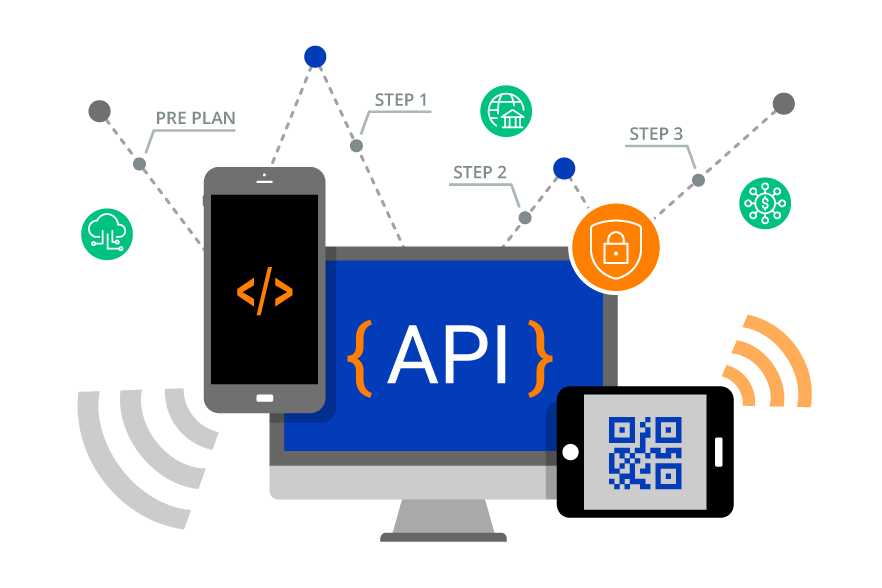